Accuracy: 80.82%


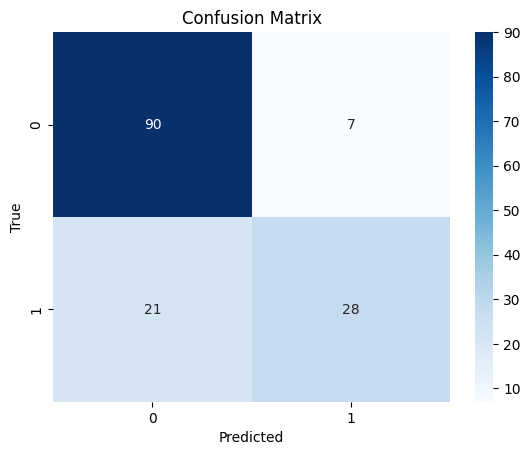

Precision: 0.80
Recall: 0.57
F1 Score: 0.67


['svm_model.pkl']

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest  # Import Isolation Forest
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("diabetes.csv", sep=",", header=0)

# Remove the SkinThickness column
df = df.drop("SkinThickness", axis=1)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Splitting data into features and outcome
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Use Isolation Forest to handle outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X)

# Remove outliers from the data
X_no_outliers = X[outliers != -1]
y_no_outliers = y[outliers != -1]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_outliers)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_no_outliers, test_size=0.2, random_state=42)

# Train the Support Vector Machine (SVM) model with an RBF kernel
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict using the SVM model
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision: %.2f" % precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall: %.2f" % recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.2f" % f1)

# Save the trained SVM model and scaler using joblib
joblib.dump([svm_classifier, accuracy, scaler], 'svm_model.pkl')
